# Họ và Tên: Trần Như Khả Ý
# MSSV: 2374802010582

### Câu 1 (2 điểm): Cho một ảnh bất kỳ (tên ảnh do sinh viên tự đặt, ví dụ: `my_image.jpg`) và thực hiện các yêu cầu sau:

* Viết chương trình sử dụng Bilateral filter để làm mịn ảnh. (0.5 điểm)  
* Viết chương trình sử dụng Canny Edge Detection để xác định biên của hình ảnh. (0.5 điểm)  
* Đổi màu ảnh bằng cách hoán đổi kênh màu theo thứ tự (ví dụ: BGR → BRG) và lưu thành tên dạng `[ten_anh]_swapped.jpg`. (0.5 điểm)  
* Chuyển ảnh sang không gian màu YCrCb và tách riêng 3 kênh Y, Cr, Cb, lưu thành ảnh grayscale tương ứng (`[ten_anh]_Y.jpg`, `[ten_anh]_Cr.jpg`, `[ten_anh]_Cb.jpg`). (0.5 điểm)


### * Viết chương trình sử dụng Bilateral filter để làm mịn ảnh. (0.5 điểm)  

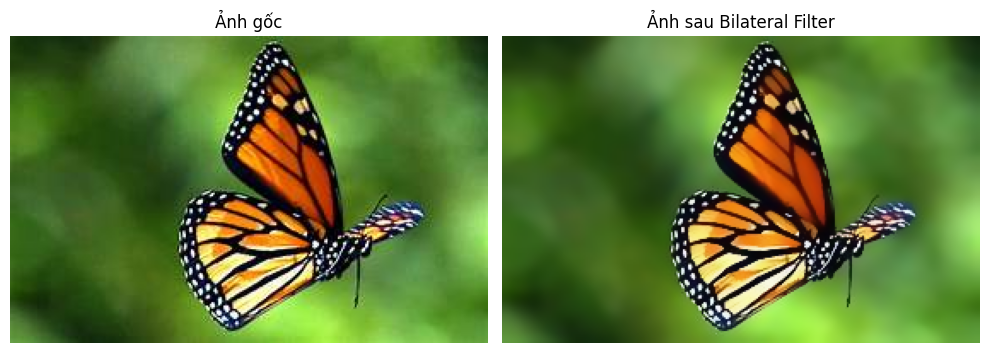

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Đọc ảnh
img = cv2.imread('image1.jpg')

# Áp dụng Bilateral Filter, d là kích thước đường kính, 
# sigmaColor là Độ lệch chuẩn trong không gian màu (color space)., 
# sigmaSpace là Độ lệch chuẩn trong không gian tọa độ (spatial space).
bilateral = cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)

# Hiển thị ảnh gốc và ảnh sau khi làm mịn
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Ảnh gốc')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(bilateral, cv2.COLOR_BGR2RGB))
plt.title('Ảnh sau Bilateral Filter')
plt.axis('off')

plt.tight_layout()
plt.show()


### * Viết chương trình sử dụng Canny Edge Detection để xác định biên của hình ảnh. (0.5 điểm)  

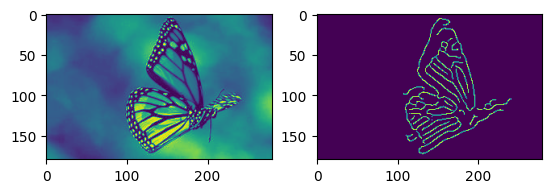

In [2]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
from skimage import feature
import matplotlib.pylab as plt
import colorsys
# opening the image and converting it to grayscale
a = iio.imread('image1.jpg', mode='L')
b = feature.canny(a, sigma=3).astype(np.uint8)

plt.subplot(1,2,1)
plt.imshow(a)
plt.subplot(1,2,2)
plt.imshow(b)
plt.show ()

### * Đổi màu ảnh bằng cách hoán đổi kênh màu theo thứ tự (ví dụ: BGR → BRG) và lưu thành tên dạng `[ten_anh]_swapped.jpg`. (0.5 điểm) 

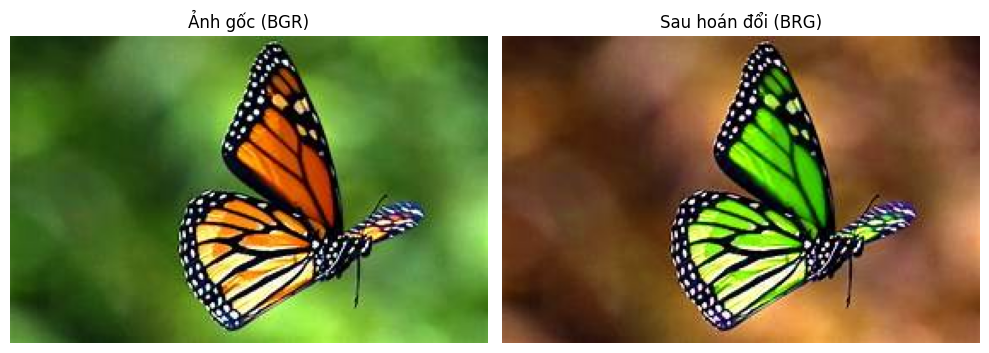

In [ ]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import random

# Đọc ảnh gốc (định dạng BGR)
data = iio.imread('image1.jpg')
# Đổi thứ tự kênh BGR → BRG
data_rgb = data[:, :, ::-1]
# Tạo thứ tự kênh bằng cách tráo 3 kênh màu
channels = [0, 2, 1]

# Đổi màu ảnh bằng cách thay đổi thứ tự kênh RGB
bdata = data_rgb[:, :, channels]
iio.imsave('image1_swapped.jpg', bdata)
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(data)
plt.title('Ảnh gốc (BGR)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(bdata, cv2.COLOR_BGR2RGB))
plt.title('Sau hoán đổi (BRG)')
plt.axis('off')

plt.tight_layout()
plt.show()




### * Chuyển ảnh sang không gian màu YCrCb và tách riêng 3 kênh Y, Cr, Cb, lưu thành ảnh grayscale tương ứng (`[ten_anh]_Y.jpg`, `[ten_anh]_Cr.jpg`, `[ten_anh]_Cb.jpg`). (0.5 điểm)

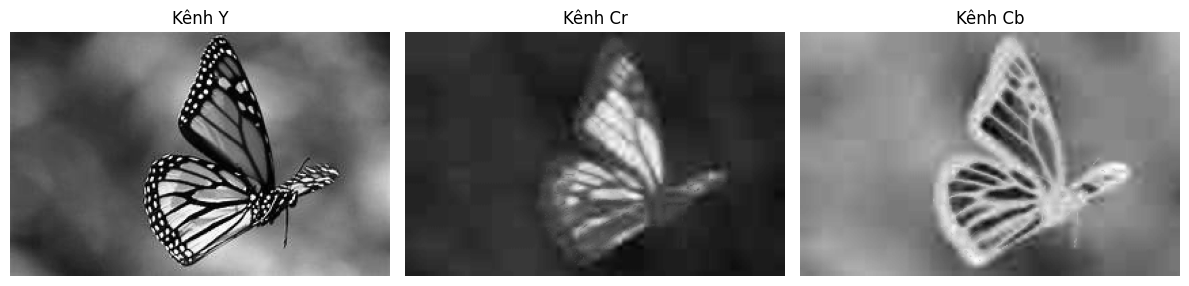

In [12]:
import cv2
import matplotlib.pyplot as plt

# Đọc ảnh màu
img = cv2.imread('image1.jpg')

# Chuyển ảnh sang không gian màu YCrCb
ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

# Tách các kênh Y, Cr, Cb
Y, Cr, Cb = cv2.split(ycrcb)

# Lưu từng kênh thành ảnh grayscale
cv2.imwrite('image1_Y.jpg', Y)
cv2.imwrite('image1_Cr.jpg', Cr)
cv2.imwrite('image1_Cb.jpg', Cb)

# Hiển thị 3 kênh dưới dạng ảnh grayscale
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(Y, cmap='gray')
plt.title('Kênh Y')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(Cr, cmap='gray')
plt.title('Kênh Cr')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(Cb, cmap='gray')
plt.title('Kênh Cb')
plt.axis('off')

plt.tight_layout()
plt.show()


### Câu 2 (4 điểm) Viết một chương trình Python sử dụng OpenCV để tạo menu tương tác cho phép người dùng chọn các kỹ thuật biến đổi hình học và xử lý ảnh nâng cao từ một danh sách, áp dụng đồng thời cho nhiều ảnh.

### Yêu cầu:

1. Menu gồm:  
* Phóng to ảnh (Zoom bằng resize) (0.5 điểm)  
* Xoay ảnh (góc ngẫu nhiên từ 0–360 độ) (0.5 điểm)  
* Lật ảnh ngang (0.5 điểm)  
* Lật ảnh dọc (0.5 điểm)  
* Cắt ảnh (crop ngẫu nhiên vùng giữa ảnh) (0.5 điểm)  
* Thêm viền (padding màu ngẫu nhiên) (0.5 điểm)

2. Chương trình xử lý đồng thời 3 ảnh bất kỳ do sinh viên tự chọn (có thể chọn bằng đường dẫn file hoặc nhập tên ảnh tùy ý). (0.5 điểm)

3. Phím tương ứng để kích hoạt các phương pháp xử lý:  
* Z: Zoom  
* T: Rotate  
* H: Horizontal Flip  
* V: Vertical Flip  
* C: Crop  
* P: Padding (0.5 điểm)

4. Lưu file kết quả với định dạng: `result_[phương pháp]_[tên ảnh gốc].jpg`  
   Ví dụ: `result_crop_cat.jpg`, `result_rotate_image1.jpg` (0.5 điểm)


== Chọn 3 ảnh để xử lý đồng thời ==

== MENU ==
Z - Zoom
T - Rotate (xoay ngẫu nhiên)
H - Horizontal Flip (lật ngang)
V - Vertical Flip (lật dọc)
C - Crop ảnh giữa
P - Padding (viền màu ngẫu nhiên)
0 - Thoát
✔ Lưu vào: output\result_zoom_3.0_image1.jpg


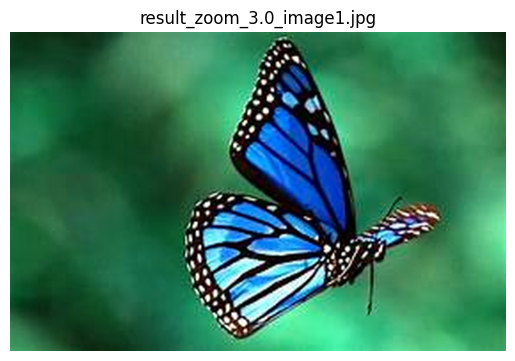

✔ Lưu vào: output\result_zoom_3.0_image2.jpg


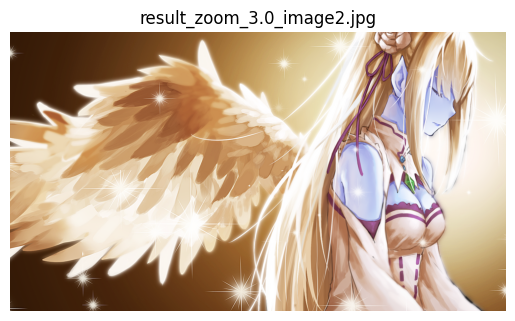

✔ Lưu vào: output\result_zoom_3.0_image3.jpg


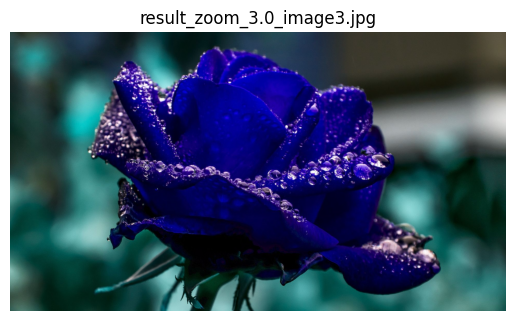


== MENU ==
Z - Zoom
T - Rotate (xoay ngẫu nhiên)
H - Horizontal Flip (lật ngang)
V - Vertical Flip (lật dọc)
C - Crop ảnh giữa
P - Padding (viền màu ngẫu nhiên)
0 - Thoát
✔ Lưu vào: output\result_crop_image1.jpg


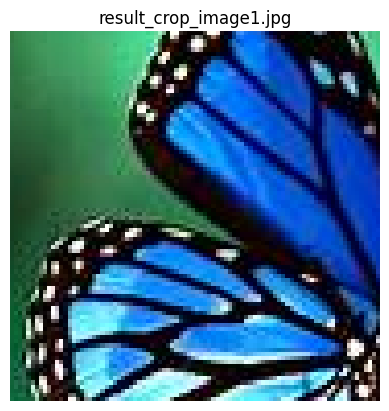

✔ Lưu vào: output\result_crop_image2.jpg


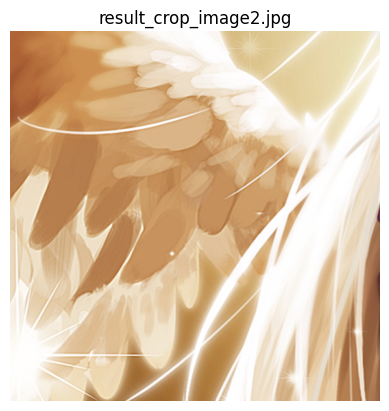

✔ Lưu vào: output\result_crop_image3.jpg


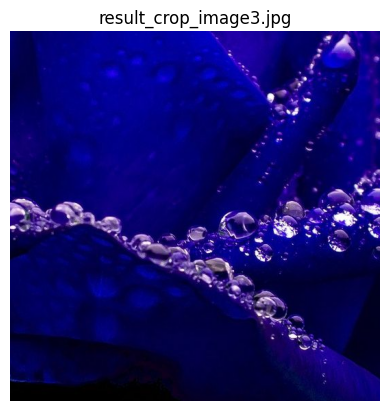


== MENU ==
Z - Zoom
T - Rotate (xoay ngẫu nhiên)
H - Horizontal Flip (lật ngang)
V - Vertical Flip (lật dọc)
C - Crop ảnh giữa
P - Padding (viền màu ngẫu nhiên)
0 - Thoát
Thoát.


In [31]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
import scipy.ndimage as nd
import os
import random
import cv2

# Phóng to ảnh với hệ số tùy chọn
def zoom_image(img, factor):
    if img.ndim == 3:  # Nếu ảnh màu (3 kênh)
        return nd.zoom(img, (factor, factor, 1)) # Giữ nguyên số kênh
    else:
        return nd.zoom(img, (factor, factor))
    
# Xoay ảnh với góc ngẫu nhiên từ 0 đến 360 độ
def rotate_image(img):
    angle = random.uniform(0, 360)
    return nd.rotate(img, angle, reshape=False), int(angle)

# Lật ảnh theo chiều ngang
def flip_horizontal(img):
    return np.fliplr(img)

# Lật ảnh theo chiều dọc
def flip_vertical(img):
    return np.flipud(img)

# Cắt vùng trung tâm của ảnh
def crop_center(img):
    h, w = img.shape[:2]
    crop_size = int(min(h, w) * 0.5)  # Cắt 50% vùng giữa theo chiều nhỏ hơn
    start_y = h // 2 - crop_size // 2
    start_x = w // 2 - crop_size // 2
    return img[start_y:start_y+crop_size, start_x:start_x+crop_size]

# Thêm viền màu ngẫu nhiên xung quanh ảnh
def padding_random(img):
    h, w = img.shape[:2]
    pad = h // 10 # Độ dày viền = 10% chiều cao ảnh
    color = np.random.randint(0, 256, size=3).tolist()  # Tạo màu ngẫu nhiên (RGB)
    return np.pad(
        img,
        ((pad, pad), (pad, pad), (0, 0)), # Thêm viền trên/dưới, trái/phải
        mode='constant',
        constant_values=tuple((c, c) for c in color)  # Gán màu viền
    )

# Hiển thị ảnh và lưu lại kết quả vào thư mục 'output'
def show_and_save(img, out_name):
    output_dir = "output"
    os.makedirs(output_dir, exist_ok=True)

    # Chuyển ảnh RGBA sang RGB nếu cần
    if img.ndim == 3 and img.shape[2] == 4:
        img = cv2.cvtColor(img, cv2.COLOR_RGBA2RGB)   # Chuyển BGR về RGB để hiển thị đúng

    full_path = os.path.join(output_dir, out_name)
    iio.imsave(full_path, img)
    print(f"✔ Lưu vào: {full_path}")

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))   # Chuyển BGR về RGB để hiển thị đúng
    plt.axis('off')
    plt.title(out_name)
    plt.show()


def main():
    print("== Chọn 3 ảnh để xử lý đồng thời ==")
    images = []
    names = []
    for i in range(3):
        path = input(f"Nhập ảnh {i+1}: ").strip()
        if not os.path.isfile(path):  # Kiểm tra ảnh có tồn tại không
            raise FileNotFoundError(f"Không tìm thấy: {path}")
        images.append(iio.imread(path))
        names.append(os.path.splitext(os.path.basename(path))[0])

    while True:
        print("\n== MENU ==")
        print("Z - Zoom")
        print("T - Rotate (xoay ngẫu nhiên)")
        print("H - Horizontal Flip (lật ngang)")
        print("V - Vertical Flip (lật dọc)")
        print("C - Crop ảnh giữa")
        print("P - Padding (viền màu ngẫu nhiên)")
        print("0 - Thoát")
        choice = input("Chọn thao tác: ").strip().upper()

        # Gán hàm xử lý và hậu tố tên
        process = None
        suffix = ""

         # Dùng match-case để chọn hàm tương ứng với lựa chọn
        match choice:
            case "Z":
                z = float(input("  Hệ số zoom: "))
                process = lambda img: zoom_image(img, z)
                suffix = f"zoom_{z}"
            case "T":
                  # Định nghĩa hàm process riêng vì cần lấy angle
                def process(img):
                    out, angle = rotate_image(img)
                    nonlocal suffix  # Cho phép thay đổi biến bên ngoài
                    suffix = f"rotate_{angle}"
                    return out
            case "H":
                process = flip_horizontal
                suffix = "hflip"
            case "V":
                process = flip_vertical
                suffix = "vflip"
            case "C":
                process = crop_center
                suffix = "crop"
            case "P":
                process = padding_random
                suffix = "padding"
            case "0":
                print("Thoát.")
                break
            case _:
                print("Lựa chọn không hợp lệ.")
                continue

        for img, name in zip(images, names):
            out_img = process(img)  # Gọi hàm xử lý tương ứng
            out_name = f"result_{suffix}_{name}.jpg"
            show_and_save(out_img, out_name)   # Hiển thị và lưu ảnh


if __name__ == "__main__":
    main()


### Câu 3 (4 điểm) Viết một chương trình Python để xử lý 3 ảnh bất kỳ do sinh viên tự chọn.

* Thêm viền đen 20 pixel cho ảnh đầu tiên. (0.5 điểm)  
* Xoay ảnh thứ hai 45 độ và phóng to 1.5 lần. (0.5 điểm)  
* Tăng kích thước ảnh thứ ba lên 4 lần, sau đó áp dụng Bilateral Filter với tham số tùy chọn. (1.5 điểm)  
* Thay đổi độ sáng và độ tương phản ảnh thứ ba theo công thức:

$$
I_{out}(x, y) = \alpha \cdot I_{in}(x, y) + \beta
$$

Trong đó:  

$$
\alpha \in [0.6, 2.0], \quad \beta \in [-60, 60]
$$

Giá trị đầu ra cần được giới hạn trong khoảng [0, 255] bằng công thức:

$$
I_{out}(x, y) = \text{clip}(I_{out}(x, y), 0, 255)
$$


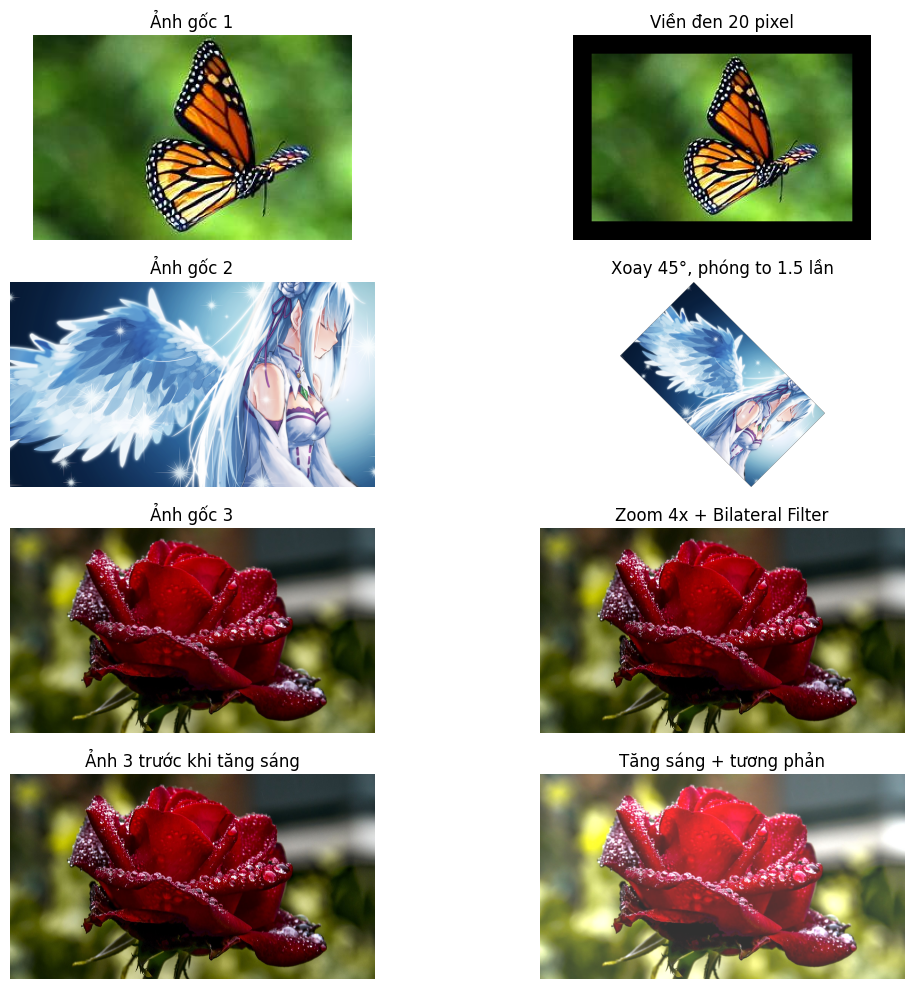

In [30]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt
data1 = iio.imread('image1.jpg')
data2= iio.imread('image2.jpg')
data3= iio.imread('image3.jpg')

# Thêm viền đen 20 pixel cho ảnh đầu tiên

d1 =np.pad(data1, pad_width=((20,20), (20, 20), (0, 0)), mode='constant', constant_values=0)

# Xoay ảnh thứ hai 45 độ và phóng to 1.5 lần 
d2 = nd.rotate(data2, -45, reshape=True)
d2_zoom = nd.zoom(d2, (1.5, 1.5, 1))


# Tăng kích thước ảnh thứ ba lên 4 lần, sau đó áp dụng Bilateral Filter với tham số tùy chọn
d3 = nd.zoom(data3, (4, 4, 1))

# Áp dụng Bilateral Filter
d3_bilateral = cv2.bilateralFilter(d3, d=9, sigmaColor=75, sigmaSpace=75)



# Tham số điều chỉnh
alpha = np.random.uniform(0.6 , 2.0)   # Tăng tương phản (0.6 - 2.0)
beta = np.random.randint(-60 , 60)   # Tăng độ sáng (-60 đến +60)

# Áp dụng công thức điều chỉnh
d4 = np.clip(alpha * data3 + beta, 0, 255).astype(np.uint8)

plt.figure(figsize=(12, 10))

# Hiển thị ảnh gốc
plt.subplot(4, 2, 1)
plt.imshow(data1)
plt.title("Ảnh gốc 1")
plt.axis('off')

plt.subplot(4, 2, 3)
plt.imshow(data2)
plt.title("Ảnh gốc 2")
plt.axis('off')

plt.subplot(4, 2, 5)
plt.imshow(data3)
plt.title("Ảnh gốc 3")
plt.axis('off')

plt.subplot(4, 2, 7)
plt.imshow(d3)  # Ảnh đã zoom trước khi xử lý độ sáng/tương phản
plt.title("Ảnh 3 trước khi tăng sáng")
plt.axis('off')


# Hiển thị ảnh đã xử lý tương ứng bên cạnh
plt.subplot(4, 2, 2)
plt.imshow(d1)
plt.title("Viền đen 20 pixel")
plt.axis('off')

plt.subplot(4, 2, 4)
plt.imshow(d2_zoom)
plt.title("Xoay 45°, phóng to 1.5 lần")
plt.axis('off')

plt.subplot(4, 2, 6)
plt.imshow(d3_bilateral)
plt.title("Zoom 4x + Bilateral Filter")
plt.axis('off')

plt.subplot(4, 2, 8)
plt.imshow(d4)
plt.title("Tăng sáng + tương phản")
plt.axis('off')

plt.tight_layout()
plt.show()


# Chúc các bạn thi may mắn và đạt điểm 10.
